In [781]:
# importing all necessay libraries 
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [782]:
# importing dataset
data = pd.read_csv("../MyDatasets/yield_df.csv")

data

Unnamed: 0      Area            Item  Year  hg/ha_yield  \
0               0   Albania           Maize  1990        36613   
1               1   Albania        Potatoes  1990        66667   
2               2   Albania     Rice, paddy  1990        23333   
3               3   Albania         Sorghum  1990        12500   
4               4   Albania        Soybeans  1990         7000   
...           ...       ...             ...   ...          ...   
28237       28237  Zimbabwe     Rice, paddy  2013        22581   
28238       28238  Zimbabwe         Sorghum  2013         3066   
28239       28239  Zimbabwe        Soybeans  2013        13142   
28240       28240  Zimbabwe  Sweet potatoes  2013        22222   
28241       28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121.00     16.37  
2                             1485.0             121.00     16.37  
3                             1485.0             121.00     16.37  
4                             1485.0             121.00     16.37  
...                              ...                ...       ...  
28237                          657.0            2550.07     19.76  
28238                          657.0            2550.07     19.76  
28239                          657.0            2550.07     19.76  
28240                          657.0            2550.07     19.76  
28241                          657.0            2550.07     19.76  

[28242 rows x 8 columns]

In [783]:
data.rename(columns={"pesticides_tonnes":"Pesticide_Used(tonnes)", "Item": "Crop"}, inplace=True) # renamed columns for clarity

In [784]:
data.columns # checking for columns 

Index(['Unnamed: 0', 'Area', 'Crop', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'Pesticide_Used(tonnes)', 'avg_temp'],
      dtype='object')

In [785]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Crop                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   Pesticide_Used(tonnes)         28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [786]:
data.isna().sum() # checking for null values

Unnamed: 0                       0
Area                             0
Crop                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
Pesticide_Used(tonnes)           0
avg_temp                         0
dtype: int64

In [787]:
data.duplicated() # checking for duplicate  values

0        False
1        False
2        False
3        False
4        False
         ...  
28237    False
28238    False
28239    False
28240    False
28241    False
Length: 28242, dtype: bool

In [788]:
data.duplicated().sum()

0

In [789]:
data.drop(columns="Unnamed: 0", inplace=True) # dropped the Unnamed:0 column since it has same value as the index

In [790]:
data.sample(n=20, random_state=5)

Area            Crop  Year  hg/ha_yield  \
27766     Uruguay        Soybeans  1997        17333   
271        Angola  Sweet potatoes  1999        82865   
27239      Uganda           Wheat  1999        18333   
6702     Colombia         Cassava  2000        99939   
649     Argentina         Cassava  2008       100000   
23760       Qatar        Potatoes  1998       103333   
16286       Japan        Soybeans  1992        17116   
12887       India         Sorghum  2004         7161   
1954   Azerbaijan        Potatoes  2008       156430   
1176    Australia  Sweet potatoes  1998       276923   
7003      Croatia        Soybeans  2006        27737   
16542       Japan        Soybeans  1998        14495   
25604       Spain     Rice, paddy  2010        75936   
21668      Norway        Potatoes  1996       231321   
14247       India        Potatoes  2012       217530   
1537    Australia     Rice, paddy  2008        75988   
6752     Colombia           Wheat  2002        17353   
3279       Brazil         Sorghum  1997        19757   
23328        Peru  Sweet potatoes  1991       145947   
14143       India        Soybeans  2011        11998   

       average_rain_fall_mm_per_year  Pesticide_Used(tonnes)  avg_temp  
27766                         1300.0                 3362.05     17.46  
271                           1010.0                   40.00     24.37  
27239                         1180.0                   88.00     23.52  
6702                          3240.0                75843.00     22.01  
649                            591.0                87149.01     17.71  
23760                           74.0                   37.00     28.48  
16286                         1668.0                79821.18     12.94  
12887                         1083.0                35113.00     25.98  
1954                           447.0                  262.99     12.30  
1176                           534.0                37215.00     12.46  
7003                          1113.0                 2150.00     10.56  
16542                         1668.0                79821.18     13.74  
25604                          636.0                39043.00     16.51  
21668                         1414.0                  698.25      1.88  
14247                         1083.0                52980.00     25.82  
1537                           534.0                42935.38     14.11  
6752                          3240.0                84023.26     22.73  
3279                          1761.0               110276.11     21.91  
23328                         1738.0                 3134.00     17.15  
14143                         1083.0                55540.00     25.06

Predictors - Crop, Area, Year, average_rain_fall_mm_per_year, Pesticide_used(tonnes), avg_temp
Target varibale - Yield
Cleaned data significantly improved model stability and reliability 

## EDA (Exploratory Data Analysis)

In [792]:
data.head()

Area         Crop  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                         1485.0   
1  Albania     Potatoes  1990        66667                         1485.0   
2  Albania  Rice, paddy  1990        23333                         1485.0   
3  Albania      Sorghum  1990        12500                         1485.0   
4  Albania     Soybeans  1990         7000                         1485.0   

   Pesticide_Used(tonnes)  avg_temp  
0                   121.0     16.37  
1                   121.0     16.37  
2                   121.0     16.37  
3                   121.0     16.37  
4                   121.0     16.37

In [793]:
data["Crop"].value_counts() # Total amount of each crop in the data set

Crop
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

In [794]:
data.columns.tolist() # checking for columns in the dataset

['Area',
 'Crop',
 'Year',
 'hg/ha_yield',
 'average_rain_fall_mm_per_year',
 'Pesticide_Used(tonnes)',
 'avg_temp']

In [795]:
df1 = data.groupby("Crop")["hg/ha_yield"].sum().reset_index() # grouping crop by yield

df1

Crop  hg/ha_yield
0               Cassava    307730510
1                 Maize    149633801
2  Plantains and others     58958974
3              Potatoes    854351426
4           Rice, paddy    137994713
5               Sorghum     56634127
6              Soybeans     53924312
7        Sweet potatoes    344077024
8                 Wheat    116158445
9                  Yams     96676873

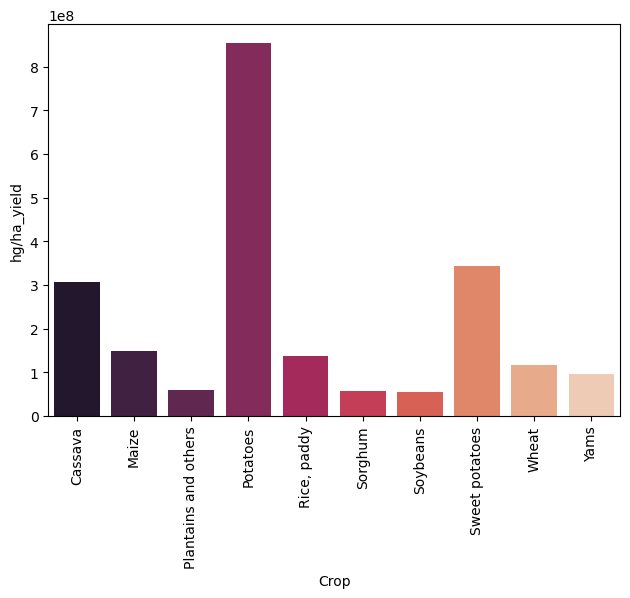

In [796]:
sns.barplot(data= df1, x="Crop", y="hg/ha_yield", hue = "Crop", palette = "rocket") # plotting crop vs. yield with a bar chart
plt.tight_layout()
plt.xticks(rotation=90)


plt.show()

In [797]:
data["Area"].value_counts()

Area
India         4048
Brazil        2277
Mexico        1472
Pakistan      1449
Japan          966
              ... 
Estonia         42
Belgium         39
Bahrain         29
Sudan           28
Montenegro      24
Name: count, Length: 101, dtype: int64

In [798]:
avg_rainfall_in_each_area_per_year = data.groupby("Area")["average_rain_fall_mm_per_year"].sum().reset_index() # grouping area by rainfall

avg_rainfall_in_each_area_per_year

Area  average_rain_fall_mm_per_year
0           Albania                       147015.0
1           Algeria                        10146.0
2            Angola                       165640.0
3         Argentina                       217488.0
4           Armenia                        35406.0
..              ...                            ...
96          Ukraine                        71190.0
97   United Kingdom                       280600.0
98          Uruguay                       209300.0
99           Zambia                       187680.0
100        Zimbabwe                       120888.0

[101 rows x 2 columns]

In [799]:
avg_temp_in_each_area = data.groupby("Area")["avg_temp"].sum().reset_index() # grouping area by average temperature

avg_temp_in_each_area

Area  avg_temp
0           Albania   1613.71
1           Algeria   1993.27
2            Angola   3987.06
3         Argentina   6516.72
4           Armenia    603.60
..              ...       ...
96          Ukraine   1060.08
97   United Kingdom   2208.64
98          Uruguay   2733.92
99           Zambia   3875.92
100        Zimbabwe   3833.04

[101 rows x 2 columns]

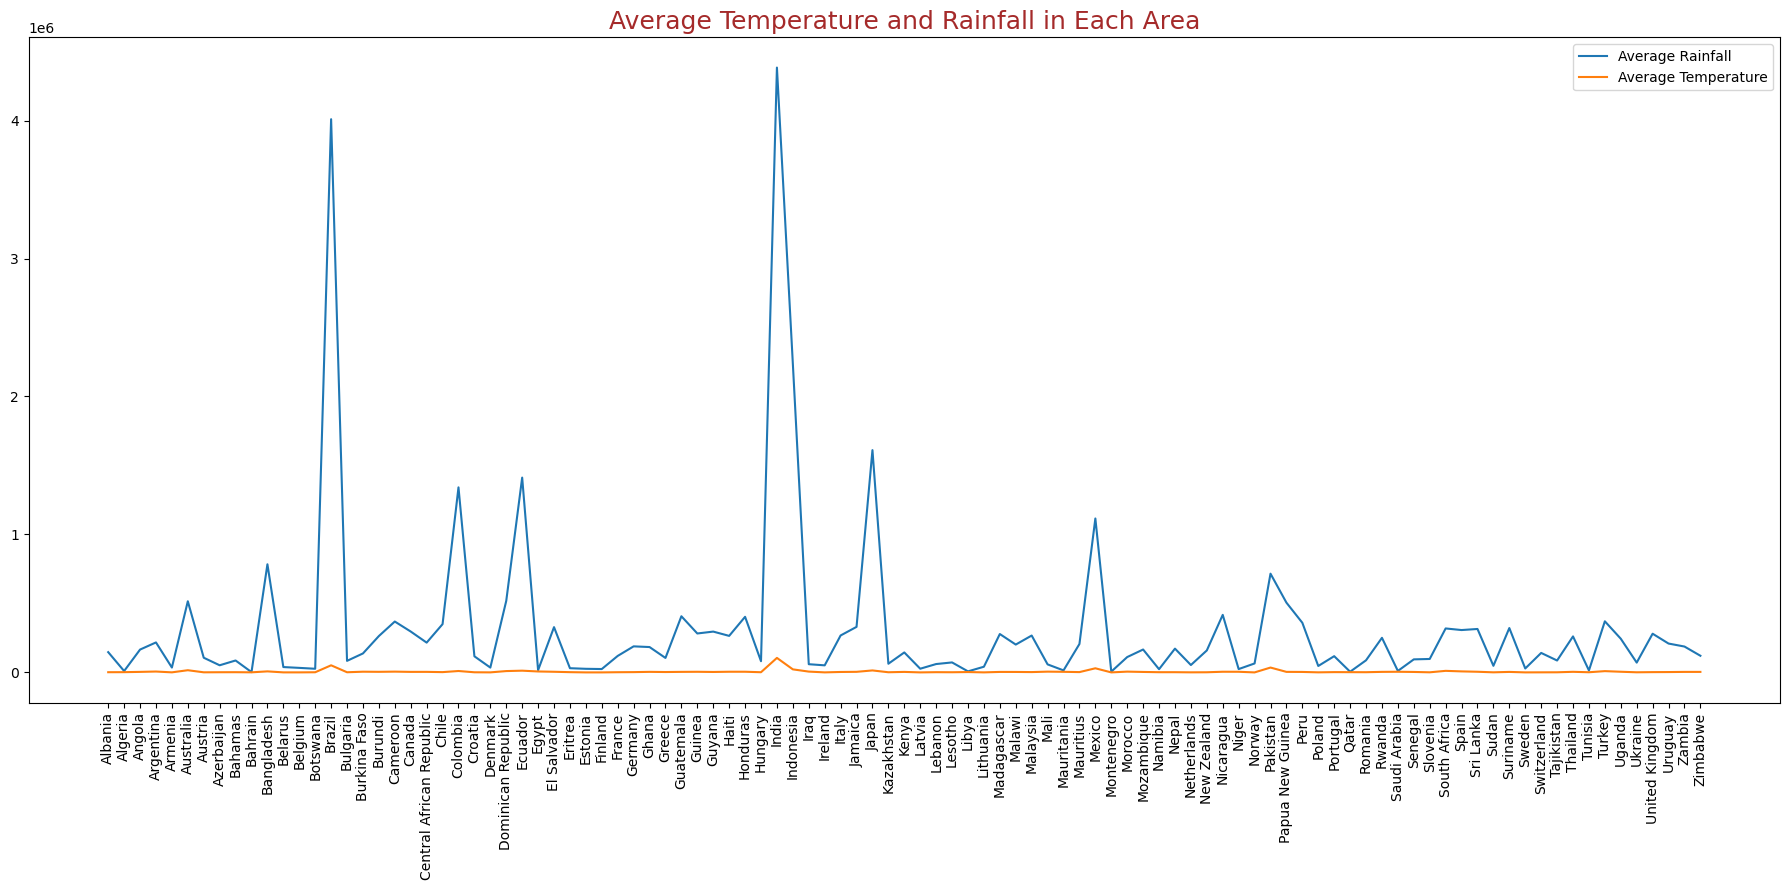

In [800]:
# ploting the average temperature and rainfall vs. Area
plt.figure(figsize=(18, 9))

plt.plot(avg_rainfall_in_each_area_per_year["Area"], avg_rainfall_in_each_area_per_year["average_rain_fall_mm_per_year"], label="Average Rainfall")
plt.plot(avg_temp_in_each_area["Area"], avg_temp_in_each_area["avg_temp"], label="Average Temperature")
plt.legend()
plt.title("Average Temperature and Rainfall in Each Area", fontsize=18, c="brown")

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [801]:
item_counts = data["Crop"].value_counts() # value count for each crop

item_counts

Crop
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

In [920]:
# item in  the column Crop
labels = item_counts.index

labels

Index(['Potatoes', 'Maize', 'Wheat', 'Rice, paddy', 'Soybeans', 'Sorghum',
       'Sweet potatoes', 'Cassava', 'Yams', 'Plantains and others'],
      dtype='object', name='Crop')

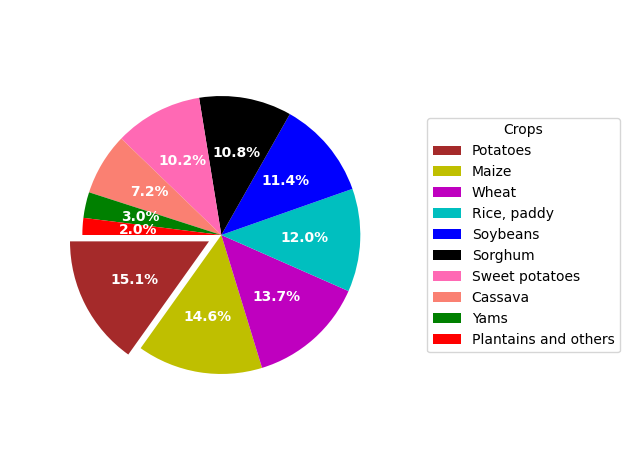

In [922]:
# Pie chart showing the proportion of each crop

sizes = [4276, 4121, 3857, 3388, 3223, 3039, 2890, 2045, 847, 556]
the_explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

wedges, texts, autotexts = plt.pie(sizes, labels=None, autopct="%1.1f%%", startangle=180, 
                                   explode=the_explode, colors= np.array(['brown', 'y', 'm', 'c', 'b', 'k', 'hotpink', "salmon", "g", "r"]))
# The explode id used to 
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
plt.legend(wedges, labels, title="Crops", loc="center left", bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.tight_layout()
plt.show()

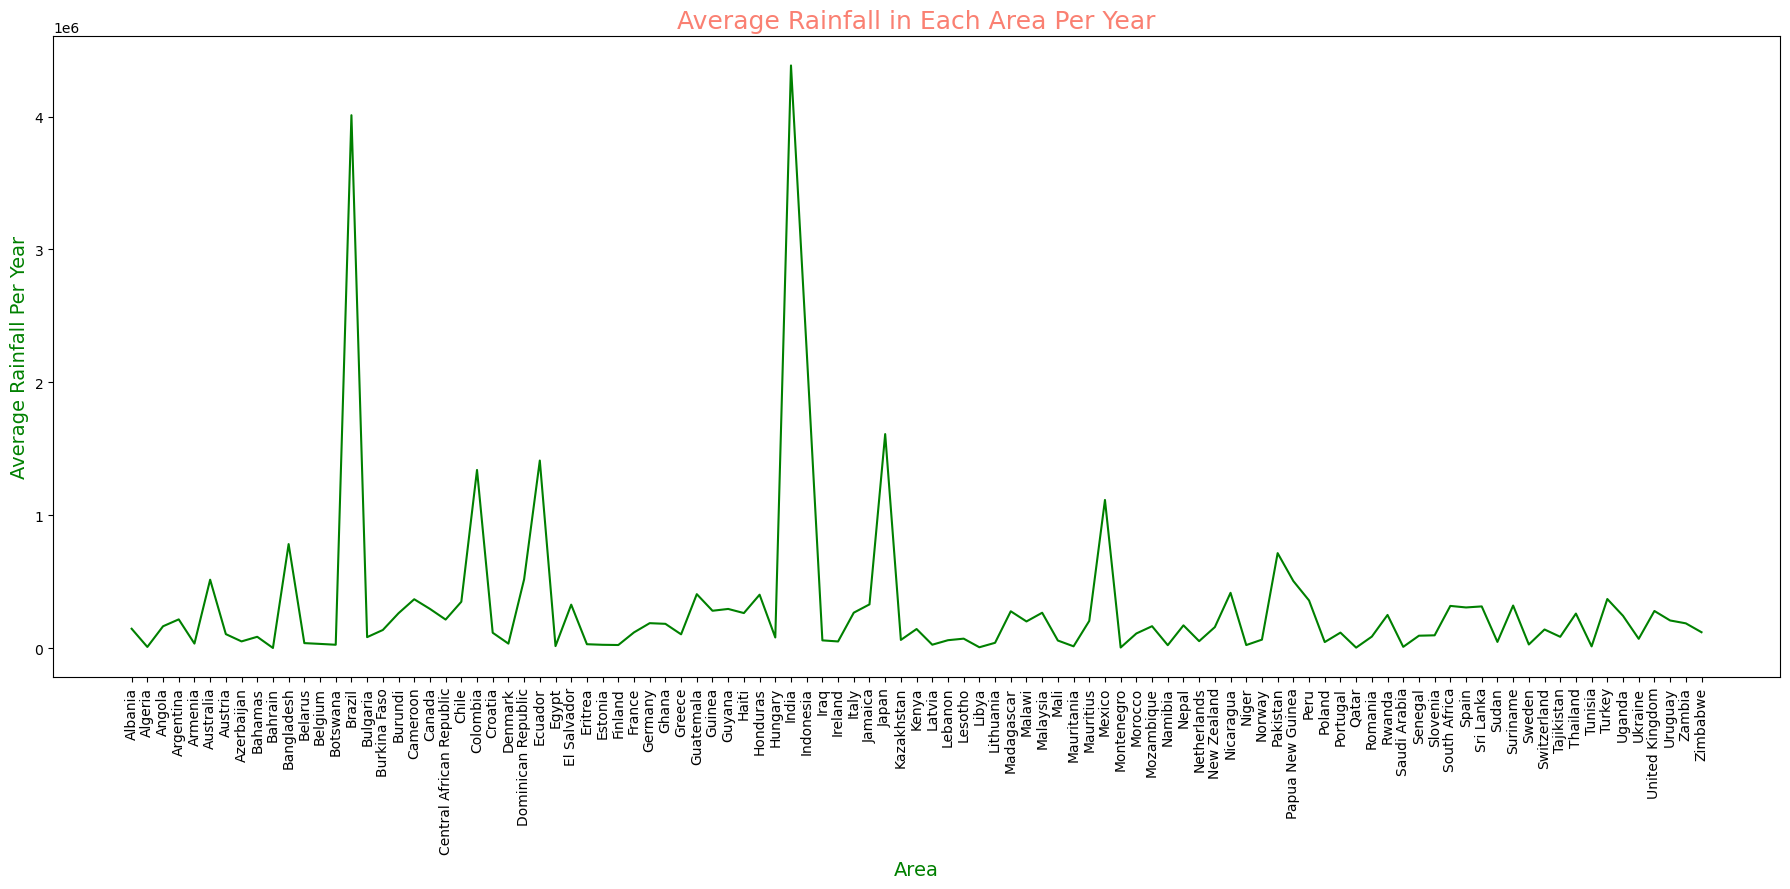

In [924]:
plt.figure(figsize=(18, 9))

plt.plot(avg_rainfall_in_each_area_per_year["Area"], avg_rainfall_in_each_area_per_year["average_rain_fall_mm_per_year"], color="green")
plt.title("Average Rainfall in Each Area Per Year", fontsize=18, c="salmon")
plt.xlabel("Area", fontsize=14, c="g")
plt.ylabel("Average Rainfall Per Year", fontsize=14, c="g")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [925]:
data.groupby("Area")["average_rain_fall_mm_per_year"].sum().reset_index() # grouping area by rainfall

Area  average_rain_fall_mm_per_year
0           Albania                       147015.0
1           Algeria                        10146.0
2            Angola                       165640.0
3         Argentina                       217488.0
4           Armenia                        35406.0
..              ...                            ...
96          Ukraine                        71190.0
97   United Kingdom                       280600.0
98          Uruguay                       209300.0
99           Zambia                       187680.0
100        Zimbabwe                       120888.0

[101 rows x 2 columns]

In [926]:
rainfall_per_year = data.groupby("Year")["average_rain_fall_mm_per_year"].sum().reset_index() # grouping year by rainfall

rainfall_per_year

Year  average_rain_fall_mm_per_year
0   1990                      1364117.0
1   1991                      1363522.0
2   1992                      1398871.0
3   1993                      1400849.0
4   1994                      1399275.0
5   1995                      1399364.0
6   1996                      1400468.0
7   1997                      1405242.0
8   1998                      1405242.0
9   1999                      1404795.0
10  2000                      1410088.0
11  2001                      1409641.0
12  2002                      1409194.0
13  2004                      1413938.0
14  2005                      1418579.0
15  2006                      1422540.0
16  2007                      1422093.0
17  2008                      1424581.0
18  2009                      1423718.0
19  2010                      1426823.0
20  2011                      1426823.0
21  2012                      1451238.0
22  2013                      1450638.0

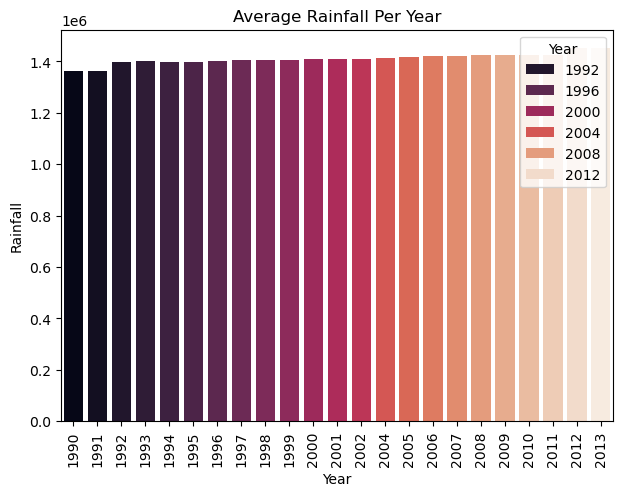

In [927]:
# barplot of rainfall per year

sns.barplot(data= rainfall_per_year, x="Year", y="average_rain_fall_mm_per_year", hue = "Year", palette = "rocket")
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('Average Rainfall Per Year')
plt.xlabel("Year")
plt.ylabel("Rainfall")
plt.show()

In [930]:
data.head()

Area         Crop  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                         1485.0   
1  Albania     Potatoes  1990        66667                         1485.0   
2  Albania  Rice, paddy  1990        23333                         1485.0   
3  Albania      Sorghum  1990        12500                         1485.0   
4  Albania     Soybeans  1990         7000                         1485.0   

   Pesticide_Used(tonnes)  avg_temp  
0                   121.0     16.37  
1                   121.0     16.37  
2                   121.0     16.37  
3                   121.0     16.37  
4                   121.0     16.37

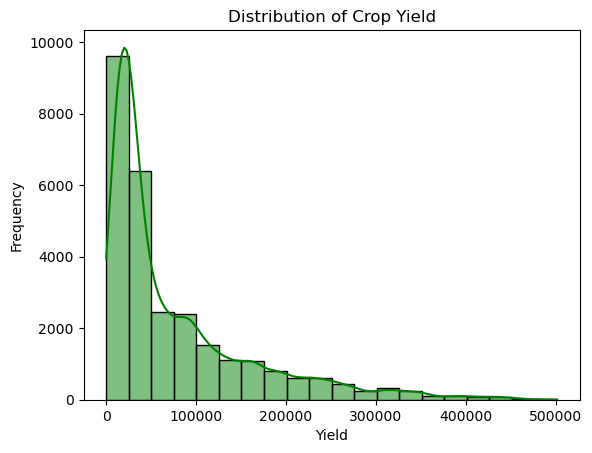

In [932]:
# Histogram showing the distribution of yield
sns.histplot(data=data, x="hg/ha_yield", bins=20, kde=True, color="g")
plt.title("Distribution of Crop Yield")
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.show()

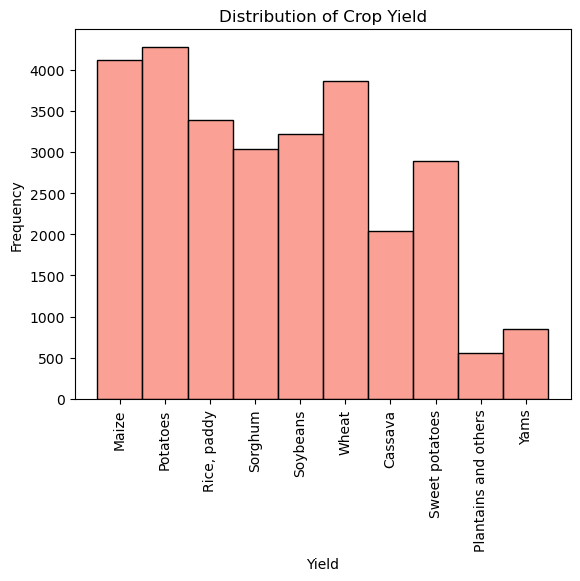

In [933]:
# histogram showing the distribution of crop yield

sns.histplot(data=data, x="Crop", bins=20, color="salmon")
plt.xticks(rotation=90)
plt.title("Distribution of Crop Yield")
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.show()

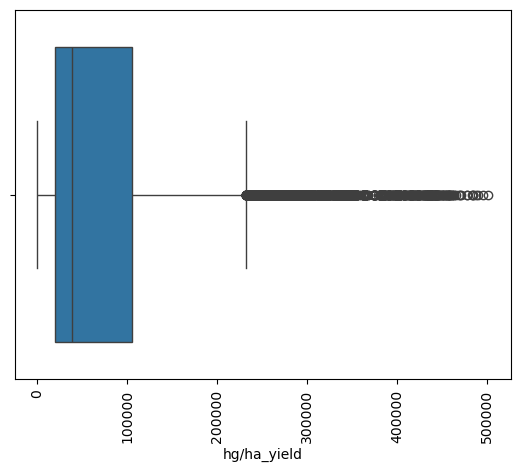

In [935]:
sns.boxplot(data=data, x="hg/ha_yield")
plt.xticks(rotation=90)

plt.show()

In [937]:
data["hg/ha_yield"].mean() # Checking the mean of the dataset

77053.33209404434

In [938]:
data["hg/ha_yield"].median() # Checking the median of the dataset

38295.0

In [940]:
Q1 = data["hg/ha_yield"].quantile(0.25) # First quartile of the dataset

Q1

19919.25

In [946]:
Q2 = data["hg/ha_yield"].quantile(0.5) # Second quartile of the dataset

Q2

38295.0

In [948]:
Q3 = data["hg/ha_yield"].quantile(0.75) # Third quartile o fthe dataset

Q3

104676.75

In [950]:
IQR = Q3 - Q1 # Interquatile range

IQR

84757.5

In [952]:
lower_bound = Q1 - 1.5 * IQR # The lower whisker

lower_bound

-107217.0

In [954]:
upper_bound = Q3 + 1.5 * IQR # The upper whisker

upper_bound

231813.0

In [956]:
numeric_columns = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'Pesticide_Used(tonnes)', 'avg_temp']

<Axes: >

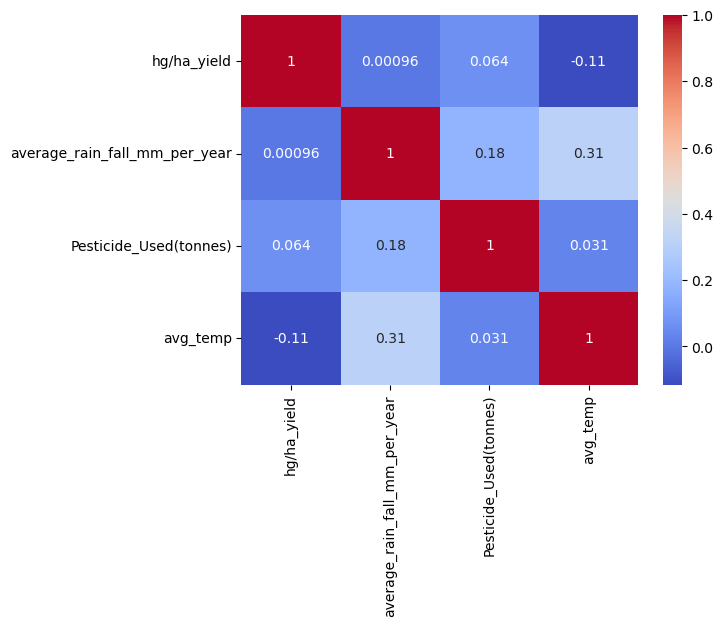

In [958]:
# Heatmap showing the correlation among features

sns.heatmap(data[numeric_columns].corr(), annot=True, cmap="coolwarm")

In [960]:
# grouping yield by pesticide used

top_area_with_high_yield = data.groupby("hg/ha_yield")["Pesticide_Used(tonnes)"].sum().reset_index() 

In [962]:
# sorting the valies in the pesticide column in decending order

top_area_with_high_yield.sort_values(by="Pesticide_Used(tonnes)", ascending=False, inplace=True) 

In [964]:
top_area_with_high_yield

hg/ha_yield  Pesticide_Used(tonnes)
3958        25497              7234293.00
4164        26817              4045558.00
4262        27491              4045558.00
9387       130913              4045558.00
9583       140795              4045558.00
...           ...                     ...
4398        28432                    0.04
7288        66582                    0.04
671          7324                    0.04
5054        34473                    0.04
763          7772                    0.04

[11514 rows x 2 columns]

In [966]:
# Grouping yield by rainfall

avg_rainfall_in_area = data.groupby("hg/ha_yield")["average_rain_fall_mm_per_year"].sum().reset_index()

avg_rainfall_in_area.sort_values(by="average_rain_fall_mm_per_year", ascending=False, inplace=True)

In [968]:
# merging pesticide and rainfall column by yield

merge_df = pd.merge(top_area_with_high_yield, avg_rainfall_in_area, how="inner", left_on="hg/ha_yield", right_on="hg/ha_yield")

In [970]:
merge_df

hg/ha_yield  Pesticide_Used(tonnes)  average_rain_fall_mm_per_year
0            25497              7234293.00                        38742.0
1            26817              4045558.00                        19371.0
2            27491              4045558.00                        19371.0
3           130913              4045558.00                        19371.0
4           140795              4045558.00                        19371.0
...            ...                     ...                            ...
11509        28432                    0.04                         1342.0
11510        66582                    0.04                         1342.0
11511         7324                    0.04                         1342.0
11512        34473                    0.04                         1342.0
11513         7772                    0.04                         1342.0

[11514 rows x 3 columns]

In [972]:
top_30 = merge_df.sample(n=30, random_state=5) # taking random sample of 30 in the merge_df dataset

In [974]:
top_30

hg/ha_yield  Pesticide_Used(tonnes)  average_rain_fall_mm_per_year
3258         14891                18908.69                         3080.0
2979         32084                24008.66                         3992.0
4549        122667                 8322.88                         1738.0
9557          9627                  134.25                         1187.0
6731        112006                 1753.20                         1712.0
1422        161620               132176.00                         6480.0
7294         14815                 1384.00                          432.0
1350         28476               143544.58                         8460.0
5541         37480                 3906.00                          608.0
6435          9905                 2144.31                         1712.0
6622         68593                 1860.70                         1712.0
8959         78182                  268.20                         1292.0
111          26125              1650000.00                        23826.0
8292         32754                  567.00                          626.0
2264         21394                62534.60                          565.0
5510         14383                 3940.77                         1784.0
8605        111330                  400.55                         1651.0
9472         16914                  148.68                          447.0
8510         16318                  449.26                         1651.0
7749         12747                  909.71                         2051.0
11237        67595                   11.52                         1440.0
2021         45660                88224.00                         1908.0
9648         41786                  121.00                         1485.0
1144         89695               168306.00                         1664.0
4770        186165                 7505.30                          652.0
9869         53222                   99.09                         1604.0
4335        240060                 9430.00                          102.0
4375        104819                 9357.00                          854.0
8420          8691                  491.03                          686.0
10490        14871                   42.00                          285.0

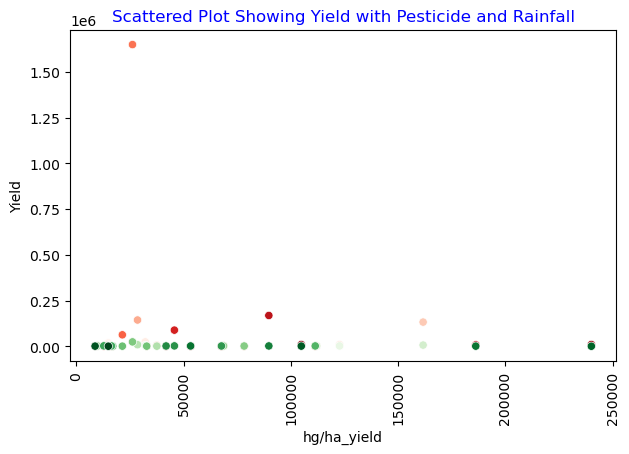

In [976]:
# scattered plot of yield vs. pesticide and rainfall vs. yield

color= np.array([0, 5, 10, 15, 19, 20, 25, 30, 32, 35, 40, 45, 47, 50, 52, 55, 58, 60, 63, 65, 70, 72, 75, 80, 84, 85, 90, 93, 95, 100])

# plt.figure(figsize=(10,6))
sns.scatterplot(data=top_30, x="hg/ha_yield", y="Pesticide_Used(tonnes)", c=color, cmap="Reds")
sns.scatterplot(data=top_30, x="hg/ha_yield", y="average_rain_fall_mm_per_year", c=color, cmap="Greens")
plt.xticks(rotation=90)
plt.title("Scattered Plot Showing Yield with Pesticide and Rainfall", color="b")
plt.ylabel("Yield")
plt.tight_layout()

plt.show()

### EDA
- Histogram showed yield distribution
- Boxplot highlighted variatiability across yield
- Heatmaps revealed weak correlations among features
- Bar chart gave insights into most grown or high-yield crops
- Pie chart show the proportion of each crop types

## Feature Encoding

In [979]:
# feature encoding, dropping the target variable which is the yield column

x = data.drop(columns=["hg/ha_yield"])

x

Area            Crop  Year  average_rain_fall_mm_per_year  \
0       Albania           Maize  1990                         1485.0   
1       Albania        Potatoes  1990                         1485.0   
2       Albania     Rice, paddy  1990                         1485.0   
3       Albania         Sorghum  1990                         1485.0   
4       Albania        Soybeans  1990                         1485.0   
...         ...             ...   ...                            ...   
28237  Zimbabwe     Rice, paddy  2013                          657.0   
28238  Zimbabwe         Sorghum  2013                          657.0   
28239  Zimbabwe        Soybeans  2013                          657.0   
28240  Zimbabwe  Sweet potatoes  2013                          657.0   
28241  Zimbabwe           Wheat  2013                          657.0   

       Pesticide_Used(tonnes)  avg_temp  
0                      121.00     16.37  
1                      121.00     16.37  
2                      121.00     16.37  
3                      121.00     16.37  
4                      121.00     16.37  
...                       ...       ...  
28237                 2550.07     19.76  
28238                 2550.07     19.76  
28239                 2550.07     19.76  
28240                 2550.07     19.76  
28241                 2550.07     19.76  

[28242 rows x 6 columns]

In [981]:
# adding the yield column in a separate variable 

y = data["hg/ha_yield"]

y

0        36613
1        66667
2        23333
3        12500
4         7000
         ...  
28237    22581
28238     3066
28239    13142
28240    22222
28241    22888
Name: hg/ha_yield, Length: 28242, dtype: int64

## Label Encoder

In [984]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Crop                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   Pesticide_Used(tonnes)         28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [986]:
# listing the object data types in the dataset

categorical_columns = data.select_dtypes(include=["object"]).columns.tolist()

categorical_columns

['Area', 'Crop']

In [988]:
x_encode = x.copy() # make a copy of the x variable

In [990]:
# Encoding values using the label encoder since the model doesn't work on object data type 

le = LabelEncoder()
for col in categorical_columns:
    x_encode[col] = le.fit_transform(x_encode[col])

In [992]:
x_encode["Area"].value_counts()

Area
42    4048
14    2277
62    1472
73    1449
48     966
      ... 
30      42
12      39
9       29
87      28
63      24
Name: count, Length: 101, dtype: int64

In [840]:
x_encode.head()

Area  Crop  Year  average_rain_fall_mm_per_year  Pesticide_Used(tonnes)  \
0     0     1  1990                         1485.0                   121.0   
1     0     3  1990                         1485.0                   121.0   
2     0     4  1990                         1485.0                   121.0   
3     0     5  1990                         1485.0                   121.0   
4     0     6  1990                         1485.0                   121.0   

   avg_temp  
0     16.37  
1     16.37  
2     16.37  
3     16.37  
4     16.37

## Feature Scaling

In [842]:
x_encode.head(10)

Area  Crop  Year  average_rain_fall_mm_per_year  Pesticide_Used(tonnes)  \
0     0     1  1990                         1485.0                   121.0   
1     0     3  1990                         1485.0                   121.0   
2     0     4  1990                         1485.0                   121.0   
3     0     5  1990                         1485.0                   121.0   
4     0     6  1990                         1485.0                   121.0   
5     0     8  1990                         1485.0                   121.0   
6     0     1  1991                         1485.0                   121.0   
7     0     3  1991                         1485.0                   121.0   
8     0     4  1991                         1485.0                   121.0   
9     0     5  1991                         1485.0                   121.0   

   avg_temp  
0     16.37  
1     16.37  
2     16.37  
3     16.37  
4     16.37  
5     16.37  
6     15.36  
7     15.36  
8     15.36  
9     15.36

In [843]:
scaler = StandardScaler()

scaledX = scaler.fit_transform(x_encode)

In [844]:
scaledX

array([[-1.73404116, -1.29811042, -1.63707532,  0.47329419, -0.61636612,
        -0.66106889],
       [-1.73404116, -0.53918079, -1.63707532,  0.47329419, -0.61636612,
        -0.66106889],
       [-1.73404116, -0.15971597, -1.63707532,  0.47329419, -0.61636612,
        -0.66106889],
       ...,
       [ 1.99550277,  0.59921367,  1.62451233, -0.69323228, -0.57585308,
        -0.12399147],
       [ 1.99550277,  0.97867849,  1.62451233, -0.69323228, -0.57585308,
        -0.12399147],
       [ 1.99550277,  1.35814331,  1.62451233, -0.69323228, -0.57585308,
        -0.12399147]])

In [845]:
y

0        36613
1        66667
2        23333
3        12500
4         7000
         ...  
28237    22581
28238     3066
28239    13142
28240    22222
28241    22888
Name: hg/ha_yield, Length: 28242, dtype: int64

## Train Test Split

In [994]:
# Splitting the dataset into 80-20% train_test_split and giving it a random state of 40

x_train, x_test, y_train, y_test = train_test_split(scaledX, y, test_size = 0.2, random_state = 40)

In [996]:
x_train.shape # checking the shape of x_train 

(22593, 6)

In [998]:
x_test.shape # Checking the shape of X_test

(5649, 6)

## Model Building with Different Algorithms 

### Linear Regression

In [852]:
lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

LinearRegression()

In [853]:
lin_reg_predict = lin_reg.predict(x_test)

lin_reg_predict

array([ 47461.01385942, 110203.94333214,  79668.93236139, ...,
        47241.18709778,  95977.323992  ,  63494.16613282])

In [854]:
y_test

14793     11915
208       33649
27908     90000
6469      45748
8931     392539
          ...  
25157     27806
11692     80716
22191    104716
26275      2156
18143      6096
Name: hg/ha_yield, Length: 5649, dtype: int64

In [855]:
r2_score(y_test, lin_reg_predict)

0.0761859137095715

In [856]:
mean_squared_error(y_test, lin_reg_predict)

6697264341.736494

In [857]:
(mean_squared_error(y_test, lin_reg_predict)) ** 0.5

81836.81532010208

### Decision Tree Regressor

In [859]:
tree_reg = DecisionTreeRegressor()

tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [860]:
tree_predict = tree_reg.predict(x_test)

In [861]:
r2_score(y_test, tree_predict)

0.9760309518385395

In [862]:
mean_squared_error(y_test, tree_predict)

173765537.82775712

In [863]:
mean_absolute_error(y_test, tree_predict)

3919.232607541158

In [864]:
(mean_squared_error(y_test, tree_predict)) ** 0.5

13182.015696689074

### Random Forest Regressor

In [866]:
rand_forest = RandomForestRegressor(random_state = 16)

rand_forest.fit(x_train, y_train)

RandomForestRegressor(random_state=16)

In [867]:
forest_pred = rand_forest.predict(x_test)

In [1000]:
r2_score(y_test, forest_pred) # Has the highest r2 score between models

0.9867810445681943

In [869]:
mean_squared_error(y_test, forest_pred)

95831878.03937009

In [870]:
mean_absolute_error(y_test, forest_pred)

3754.533664365374

In [1002]:
(mean_squared_error(y_test, forest_pred)) ** 0.5 # has the lowest RMSE 

9789.375773733997

### XGBoost Regressor

In [873]:
XG_boost = XGBRegressor(random_state = 9)

In [874]:
XG_boost.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=9, ...)

In [875]:
XGB_preds = XG_boost.predict(x_test)

In [876]:
r2_score(y_test, XGB_preds)

0.975135326385498

In [877]:
(mean_squared_error(y_test, XGB_preds)) ** 0.5

13426.029682856179

### Model performance 
- linear Regression underperformed due to non-linear relationships
- Tree-based models(especially Random Forest) excelled, capturing complex interactions
- Random Forest is the best-performing model for the dataset

## Hyperparameter Tuning

### RandomSearchCV for Random Forest

In [880]:
rand_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 16,
 'verbose': 0,
 'warm_start': False}

In [916]:
parameter_grid = {'n_estimators':[100, 200, 300, 500], 'max_depth': [None, 10, 20, 30], 
                  'min_samples_split': [2, 5, 10], 'min_samples_leaf':[1,2, 4], 'max_features': ['sqrt', 'log2']}

In [918]:
random_search = RandomizedSearchCV(estimator= rand_forest, param_distributions = parameter_grid, n_iter = 20, 
                                   cv=5, scoring='r2', verbose=2, random_state=42, n_jobs=-1)

In [883]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=16),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='r2', verbose=2)

In [884]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 20}

In [885]:
best_model = random_search.best_estimator_

In [886]:
y_pred = best_model.predict(x_test)

In [887]:
r2_score(y_test, y_pred)

0.9789226582039623

In [888]:
mean_squared_error(y_test, y_pred)

152801880.5125875

In [889]:
(mean_squared_error(y_test, y_pred)) ** 0.5

12361.3057770038

### Used RandomSearchCV to tune hyperparameters like 
- n_estimators
- max_depth
- min_samples_split
- min_sample_leaf
- max_features


  Achieved no improvement in r2 score and RMSE

## Feature Importance

In [893]:
importance = rand_forest.feature_importances_

importance

array([0.05698938, 0.61115829, 0.02986748, 0.08516116, 0.10423706,
       0.11258663])

In [895]:
features = x.columns

features

Index(['Area', 'Crop', 'Year', 'average_rain_fall_mm_per_year',
       'Pesticide_Used(tonnes)', 'avg_temp'],
      dtype='object')

In [897]:
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': importance})

importance_df

Feature  Importance
0                           Area    0.056989
1                           Crop    0.611158
2                           Year    0.029867
3  average_rain_fall_mm_per_year    0.085161
4         Pesticide_Used(tonnes)    0.104237
5                       avg_temp    0.112587

In [899]:
importance_df.columns

Index(['Feature', 'Importance'], dtype='object')

In [901]:
importance_df.sort_values(by="Importance", ascending=False, inplace=True)

In [903]:
importance_df

Feature  Importance
1                           Crop    0.611158
5                       avg_temp    0.112587
4         Pesticide_Used(tonnes)    0.104237
3  average_rain_fall_mm_per_year    0.085161
0                           Area    0.056989
2                           Year    0.029867

[]

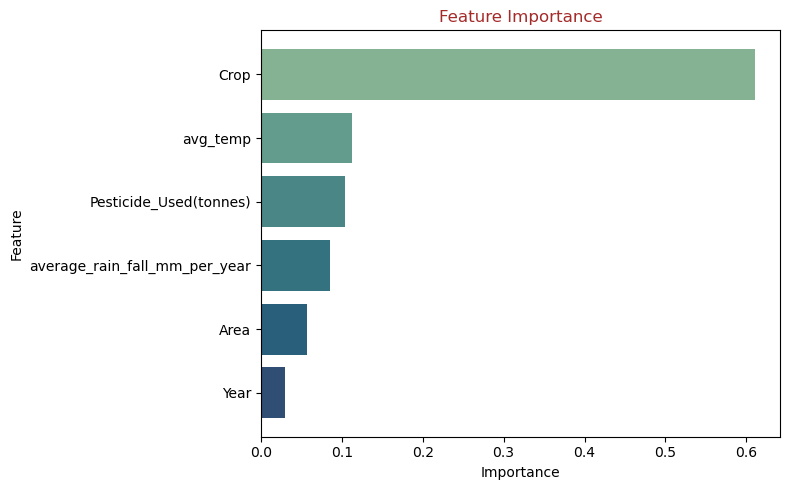

In [905]:
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x="Importance", y="Feature", hue="Feature", palette="crest")
plt.title("Feature Importance", color="brown")
plt.tight_layout()
plt.plot()

### Feature Importance
Type crop is the most important factor, confirming that yield is crop-specific. Whether conditions also play a strong role

## Cross Validation

### Cross Validation for XGBoost

In [909]:
score = cross_val_score(XG_boost, x_train, y_train, cv=15, scoring= "r2")

In [910]:
score

array([0.97512156, 0.97388315, 0.97416764, 0.97354949, 0.9736625 ,
       0.97504115, 0.98083919, 0.97429949, 0.97327441, 0.97120202,
       0.97091544, 0.97927117, 0.9790948 , 0.97419125, 0.97563338])

### Cross Validation for Random Forest

In [912]:
score_rf = cross_val_score(rand_forest, x_train, y_train, cv=20, scoring="r2")

score_rf

array([0.98420969, 0.98386672, 0.98608753, 0.98654672, 0.98438126,
       0.98854326, 0.98476261, 0.98659329, 0.98975784, 0.98909071,
       0.98439915, 0.98197805, 0.98430749, 0.98537273, 0.98995633,
       0.98957412, 0.98662729, 0.98505096, 0.98985815, 0.98657288])